# Retail Sector Domain Analysis

# Business Problem

In Retail Sector, it is potential to unlock insights to win and retain customers, drive business efficiencies and ultimately improve performance in terms of sales and customer interest. Beyond the hype, retail organization are using advance analysis to do everything from understanding their customers to improve forecasting, driving better , faster results. Since the resources that a company has are limited, it is vital to find these customers and target them to win customer loyalty, drive business efficiencies and ultimately improve performance.


# Objective

To predict likelihood of  customers shopping next month

# Variables

The variable names and their descriptions are as follows:

1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

3. Description: Product (item) name. Nominal.

4. Quantity: The quantities of each product (item) per transaction. Numeric.

5. InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.

7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

8. Country: Country name. Nominal, the name of the country where each customer resides.

####  1. Data Preprocessing
#### 2. Exploring the content of variables
    2.1 Countries
    2.2 Customers and products
        2.2.1 Cancelling orders   
        2.2.2 StockCode  
        2.2.3 Basket price   
#### 3. Insight on product categories
    3.1 Product description
    3.2 Defining product categories
        3.2.1 Data encoding
        3.2.2 Clusters of products
        3.2.3 Characterizing the content of clusters
#### 4. Customer categories
    4.1 Formating data
        4.1.1 Grouping products
        4.1.2 Time spliting of the dataset
        4.1.3 Grouping orders
    4.2 Creating customer categories
        4.2.1 Data enconding
        4.2.2 Creating categories
#### 5. Classifying customers
    5.1 Support Vector Machine Classifier (SVC)
        5.1.1 Confusion matrix
        5.1.2 Leraning curves
    5.2 Logistic regression
    5.3 k-Nearest Neighbors
    5.4 Decision Tree
    5.5 Random Forest
    5.6 AdaBoost
    5.7 Gradient Boosting Classifier
    5.8 Let's vote !
#### 6. Testing the predictions
#### 7. Conclusion

# Import Modules


In [1]:
# importing necessary Python libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.patches as mpatches

from nltk import pos_tag, word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary  ## BOW
from gensim import corpora, models     ## TFIDF
from gensim.test.utils import datapath  ## save/load model
from gensim.models import LdaMulticore ## LDA-MODEL for clustering products


from kmodes.kmodes import KModes
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.decomposition import PCA
from pprint import pprint

from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing, model_selection, metrics, feature_selection


import datetime, warnings
warnings.filterwarnings("ignore")
%matplotlib inline



import matplotlib as mpl
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot, plot, download_plotlyjs
init_notebook_mode(connected=True)

# Import Dataset

We import our data using .read_excel() method and we also add a parameter "encoding='latin'" as default encoding engine wasn't able to process this particular dataset. So next time you have difficulties importing data and everything seems to be correct and OK, check out encoding. That might save you some time of googling to try to understand what's wrong.

#### Loading the Dataset

In [3]:
df = pd.read_excel('Retail-Ecommerce.xlsx', encoding="ISO-8859-1", dtype= {'CustomerID': str})  
## CustomerID  is float (1532.0)-> str while reading the dataset will remove .0 at end
## if convert it to string after reading 
## df['CustomerID'] = df['CustomerID'].astype('str')
## the .0 will be treated as character and remain in the 'CustomerID' Field

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Just by looking at first 5 rows of our table we can understand the structure and datatypes present in our dataset. We can notice that we will have to deal with timeseries data, integers and floats, categorical and text data.

In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [5]:
df.shape

(541909, 8)

### Quick Statistical Overview

##### Dealing with Types

.read_excel() method performs basic type check, but it doesn't do that perfectly. That's why it is much better to deal with data types in our dataframe before any modifications to prevent additional difficulties. Every pandas dataframe has an attribute .dtypes which will help us understand what we currently have and what data has to be casted to correct types.

In [6]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


If we have datetime data it's better to cast it to datetime type. We don't touch InvoiceNo for now as it seems like data in this column has not only numbers. (we saw just first 5 rows, while pandas during import scanned all the data and found that the type here is not numerical).

In [8]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Just a quick look at data with .describe() method gives us a lot of space to think. We see negative quantities and prices, we can see that not all records have CustomerID data, we can also see that the majority of transactions are for quantites from 3 to 10 items, majority of items have price up to 5 pounds and that we have a bunch of huge outliers we will have to deal with later.

In [9]:
pd.DataFrame(df.nunique())

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


# Data Preprocessing

Next and very important step is dealing with missing values. Normally if you encounter null values in the dataset you have to understand nature of those null values and possible impact they could have on the model. There are few strategies that we can use to fix our issue with null values:

* delete rows with null values

* delete the feature with null values

* impute data with mean or median values or use another imputing strategy (method .fillna())

Let's check out what we have here.

#### Cleanning Data

In [10]:
# Checking for Null values
nullTable = pd.DataFrame(df.dtypes ).T.rename(index={0: "types"})
nullTable = nullTable.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0: "count"}))
nullTable = nullTable.append(pd.DataFrame(df.isnull().sum() /df.shape[0]*100 ).T.rename(index={0: "%"}))
nullTable

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
types,object,object,object,int64,datetime64[ns],float64,object,object
count,0,0,1454,0,0,0,135080,0
%,0,0,0.268311,0,0,0,24.9267,0


CustomerID has too much null values and this feature cannot predict a lot so we can just drop it. 
Around 25% of Customers Ids are null ... can't deal with such prob, so we drop them

In [11]:
# Removing Null Values
df.dropna(axis= 0, subset=['CustomerID'], inplace=True)

In [12]:
pd.DataFrame(df.isnull().sum()).T

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,0,0,0,0,0,0,0


Now data is cleaned of null values, Now removing duplicates

#### Duplicate Data

In [13]:
#Checking for Dulpicates
print("There Exist {:,} duplications in our data,".format(df.duplicated().sum()))

There Exist 5,225 duplications in our data,


In [14]:
#Removeing Duplicate entries
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Our data shape after such cleaning processes

In [15]:
df.shape

(401604, 8)

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# Exploratory Data Analysis

Every data science project starts with EDA as we have to understand what do we have to deal with. I divide EDA into 2 types: visual and numerical. Let's start with numerical as the simple pndas method .describe() gives us a lot of useful information.

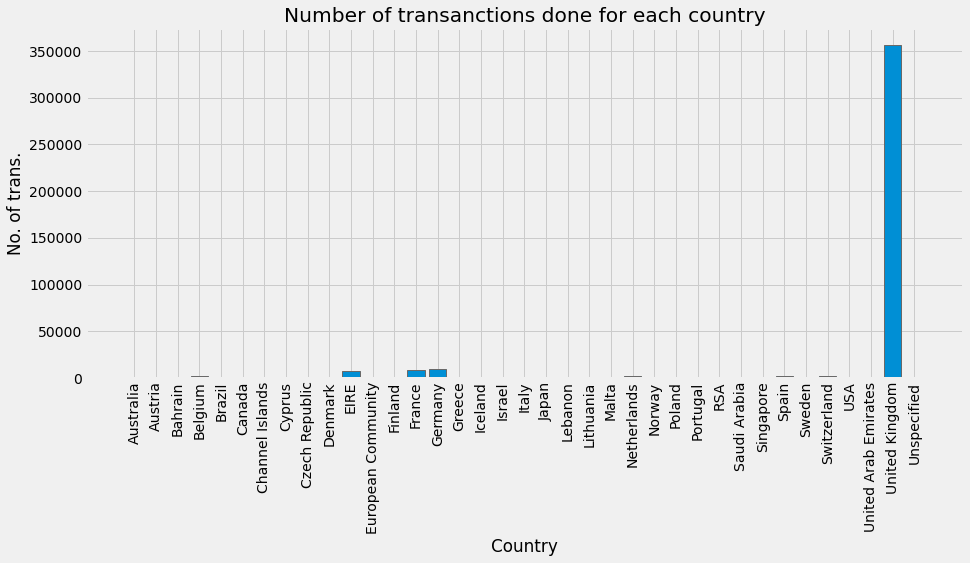

In [17]:
plt.figure(figsize=(14,6))
plt.bar(list(df.groupby(['Country']).groups.keys()), df.groupby(['Country'])['CustomerID'].count())
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Number of transanctions done for each country")
plt.ylabel("No. of trans.")
plt.xlabel("Country")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text major ticklabel objects>)

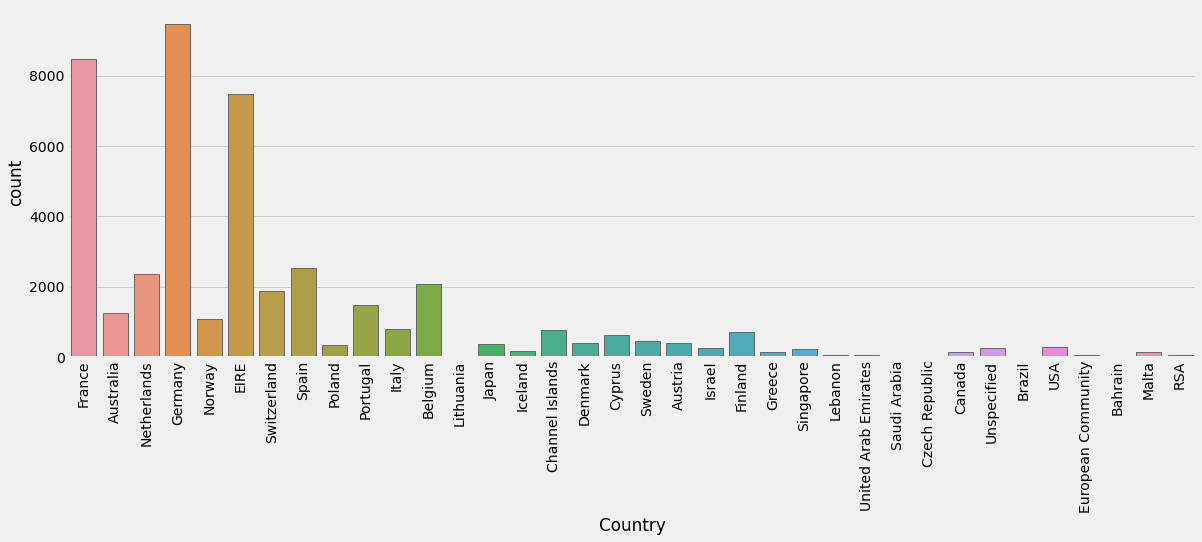

In [18]:
plt.figure(figsize=(18,6))
sns.countplot(df[df['Country'] != 'United Kingdom']['Country'])
plt.xticks(rotation=90)

From above plots and calculations we can see that vast majority of sales were made in UK and just 8.49% went abroad. We can say our dataset is skewed to the UK side

In [19]:
info = pd.DataFrame(data = df.groupby(['Country'])['InvoiceNo'].nunique(), index=df.groupby(['Country']).groups.keys()).T
info

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
InvoiceNo,69,19,2,119,1,6,33,20,5,21,...,1,2,10,105,46,71,7,3,19857,8


#### Observations:

1. UK has done most of the transanctions. (19857)

2. Least amount of transanctions were made by countries like Brazil, RSA etc. (only 1)

In [20]:
# StockCode Feature ->
# We will see how many different products were sold in the year data was collected.
print(len(df['StockCode'].value_counts()))

3684


In [21]:
# Transanction feature
# We will see how many different transanctions were done.
print(len(df['InvoiceNo'].value_counts()))

22190


In [22]:
# Transanction feature
# We will see how many different Customers are there.
print(len(df['CustomerID'].value_counts()))

4372


### Checking out columns separately

Also it makes sense to go feature by feature and check what pitfalls we have in our data and also to understand our numbers better.


Let's continue checking Description column. Here we can see items that were bought most often.

In [23]:
df['Description'].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
Name: Description, dtype: int64

Here we can see our best selling products, items that appear in orders the most often. Also to make it visually more appealing let's create a bar chart for 15 top items.

In [24]:
#ranking of the most ordered products
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
JUMBO BAG RED RETROSPOT,44963
ASSORTED COLOUR BIRD ORNAMENT,35215
WHITE HANGING HEART T-LIGHT HOLDER,34128
PACK OF 72 RETROSPOT CAKE CASES,33386


In [26]:
#how many invoices are there in the data set
df["InvoiceNo"].nunique()

22190

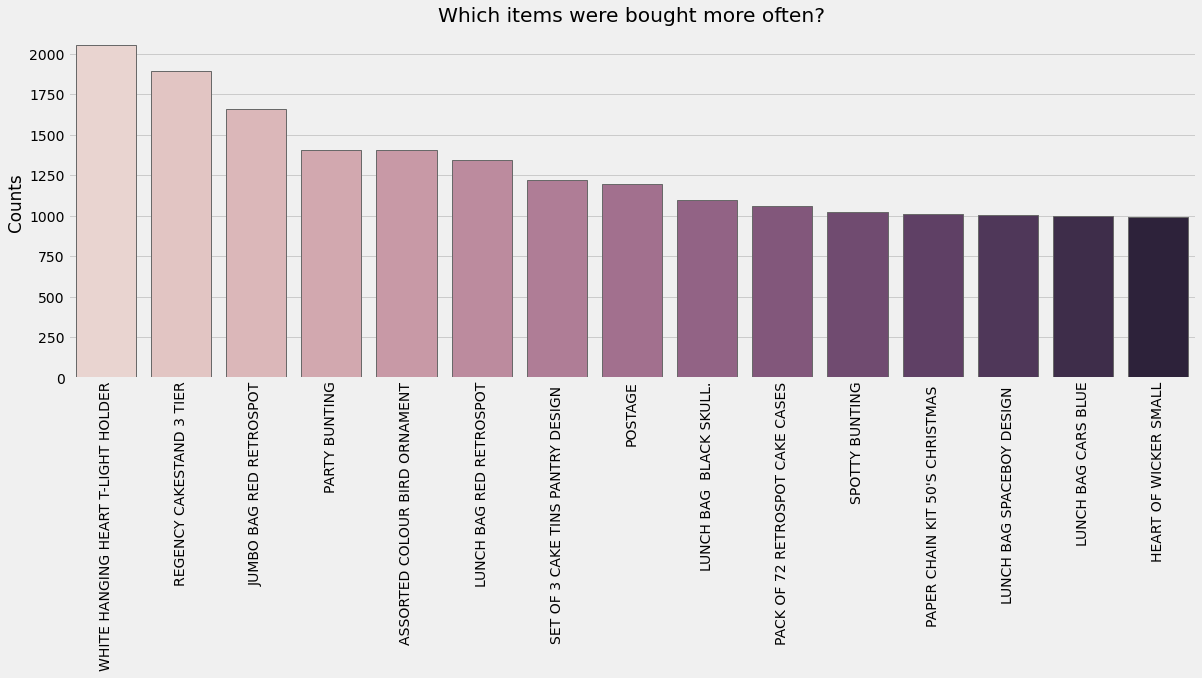

In [27]:
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [28]:
df['Description'].value_counts().tail()

PINK CRYSTAL GUITAR PHONE CHARM    1
FLAG OF ST GEORGE CAR FLAG         1
PINK POODLE HANGING DECORATION     1
SCALLOP SHELL SOAP DISH            1
GREEN WITH METAL BAG CHARM         1
Name: Description, dtype: int64

We also notice from above code that valid items are normally uppercased and non-valid or cancelations are in lower case

In [29]:
df = df[df['Description'].str.contains('\*')==False]

In [30]:
df[~df['Description'].str.isupper()]['Description'].value_counts().head()

Manual                                460
BAG 125g SWIRLY MARBLES               252
3 TRADITIONAl BISCUIT CUTTERS  SET    207
BAG 250g SWIRLY MARBLES               201
POLYESTER FILLER PAD 40x40cm          185
Name: Description, dtype: int64

Quick check of the case of letters in Description says that there are some units with lower case letters in their name and also that lower case records are for canceled items. Here we can understand that data management in the store can be improved.

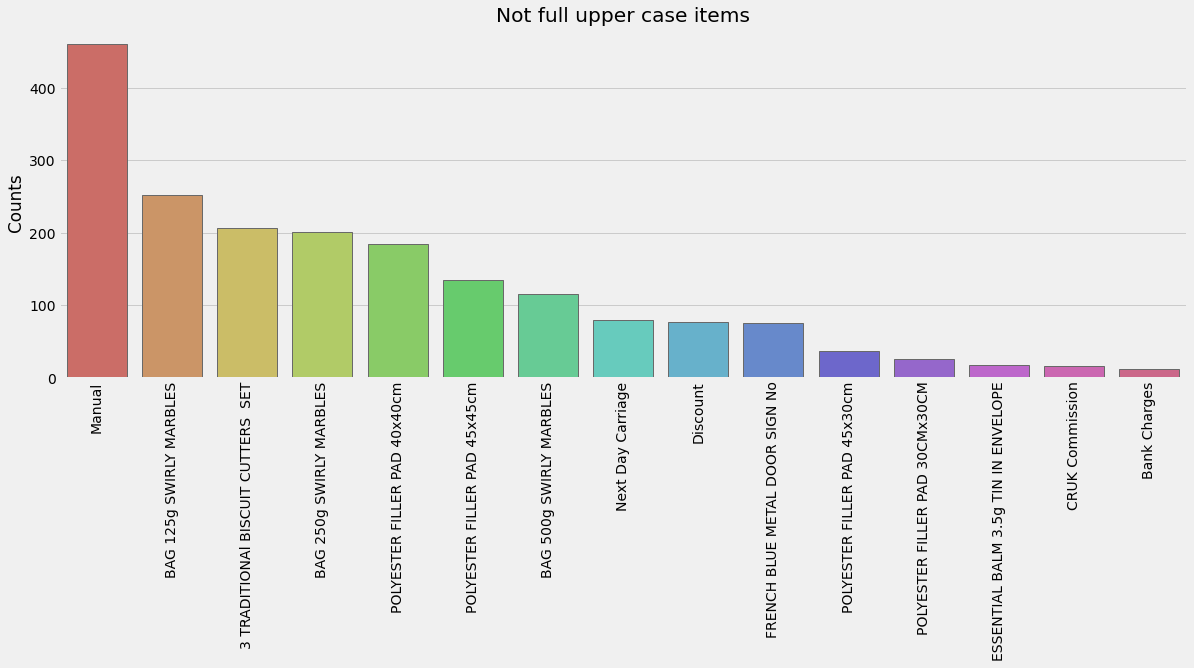

In [31]:
lcase_counts = df[~df['Description'].str.isupper()]['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(lcase_counts.index, lcase_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Counts")
plt.title("Not full upper case items");
plt.xticks(rotation=90);

ALso checking out stoke codes, looks like they are deeply correlated with descriptions - which makes perfect sense.

In [32]:
df['StockCode'].value_counts().head()

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
Name: StockCode, dtype: int64

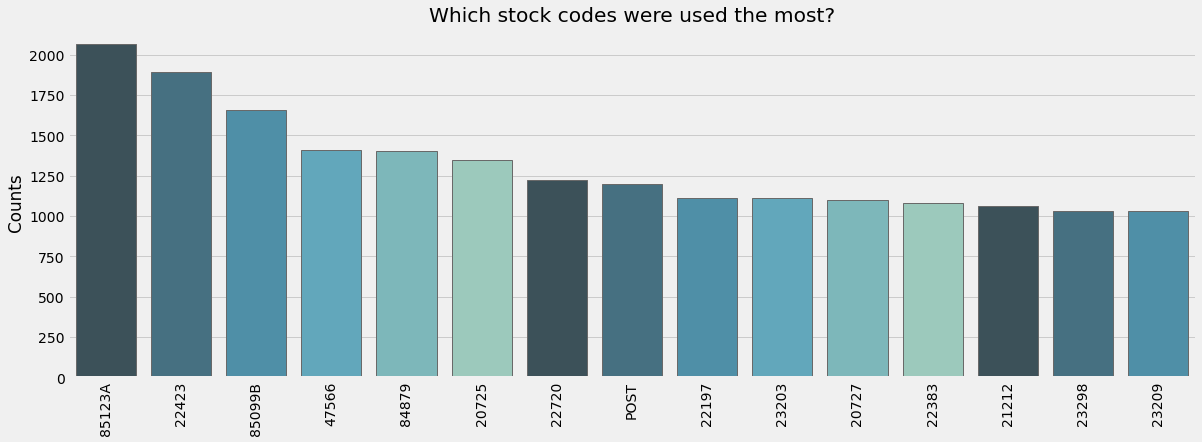

In [33]:
stock_counts = df['StockCode'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(stock_counts.index, stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?");
plt.xticks(rotation=90);

Checking out also InvoiceNo feature.

In [34]:
df['InvoiceNo'].value_counts().tail()

C559740    1
556725     1
556785     1
C542644    1
C548391    1
Name: InvoiceNo, dtype: int64

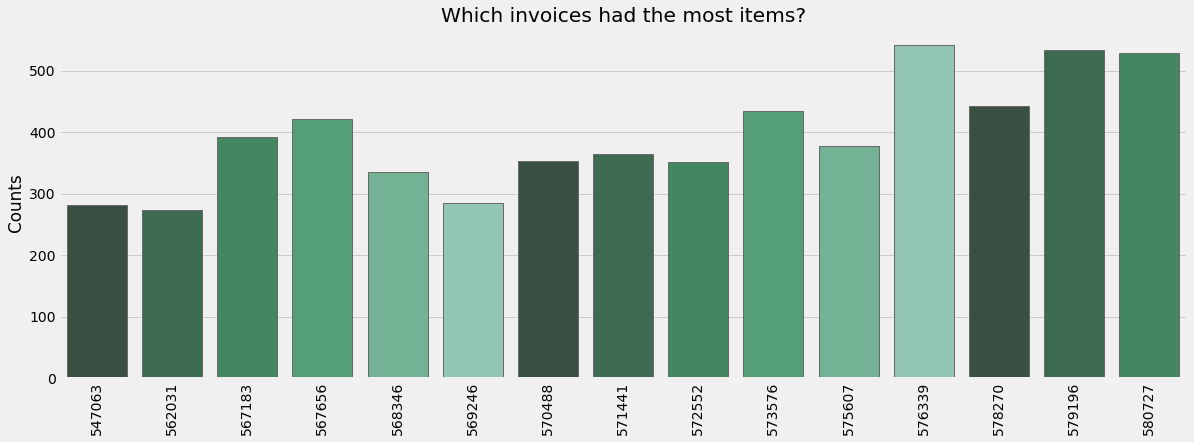

In [35]:
inv_counts = df['InvoiceNo'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(inv_counts.index, inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("Counts")
plt.title("Which invoices had the most items?");
plt.xticks(rotation=90);

In [37]:
#which are the most expensive products?
df.sort_values("UnitPrice", ascending = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029,United Kingdom
173391,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029,United Kingdom
268027,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448,United Kingdom


In [38]:
#top 5 countries with the highest number of orders
df["Country"].value_counts().head()

United Kingdom    356728
Germany             9480
France              8475
EIRE                7475
Spain               2528
Name: Country, dtype: int64

### Data Description


► InvoiceNo : Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

► StockCode : Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

► Description : Product (item) name. Nominal.

► Quantity : The quantities of each product (item) per transaction. Numeric.

► InvoiceDate : Invice Date and time. Numeric, the day and time when each transaction was generated.

► UnitPrice : Unit price. Numeric, Product price per unit in sterling.

► CustomerID : Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

► Country : Country name. Nominal, the name of the country where each customer resides.

### 1. Country

In [42]:
print( "We have {} countires trading all over the world ".format(df.Country.nunique()))

We have 37 countires trading all over the world 


In [43]:
countries = df.Country.value_counts()
data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names', z = countries,
            text = countries.index, colorbar = {'title':'Orders'},
            colorscale= 'Reds',
            reversescale = False
           )
layout = dict(title='Geographic View',
                geo = dict(showframe = True, projection=dict(type = 'winkel tripel'))
             )
gmap = go.Figure(data = [data], layout = layout)
py.iplot(gmap)

Apparently most of our sales from United Kingdom

In [44]:
data = [
    go.Bar(
        y = countries.index[:7],
        x = countries.values[:7],
        orientation='h',
        marker={
            'color':countries.values,
            'colorscale': 'Portland'
            }
        )
     ]

py.iplot(data, filename='basic-bar')

In [45]:
pd.DataFrame([{
    'Customers': df.CustomerID.nunique(),
    'Products': df.StockCode.nunique(),
    'Transactions': df.InvoiceNo.nunique()
            }
]).rename(index = {0:"Num"})

,Customers,Products,Transactions
Num,4372,3684,22190


There are 22k transanctions but only 4k customers with 3.5k products. It seems that some orders were placed then cancelled or the customers bought items multiple times or multiple items were bought in a single transaction

In [46]:
customers = df.CustomerID.value_counts().sort_values(ascending=False)
print("99% of Users  Make {:.0f} Transactions, While Our Favourite Client Visits us {} times".
      format(np.round(customers.quantile(0.99)), customers.max()))

99% of Users  Make 658 Transactions, While Our Favourite Client Visits us 7812 times


### Checking the number of items bought in a single transaction:

In [47]:
temp = df.groupby(by=['CustomerID','InvoiceNo'])['InvoiceDate'].count().reset_index()
temp = temp.rename(columns={'InvoiceDate':'Num. Products'})
temp.head(10)

,CustomerID,InvoiceNo,Num. Products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24
5,12347,556201,18
6,12347,562032,22
7,12347,573511,47
8,12347,581180,11
9,12348,539318,17



There are customers who purchase only 1 item per transaction and others who purchase many items per transanction. Also there are some orders which were cancelled they are marked with 'C' in the beginning.

### 2. Analysis on cancelation processes

Looks like Invoices that start with 'C' are the "Canceling"/"Returning" invoices. This resolves the mistery with negative quantities.

##### Counting number of cancelled transanctions:

In [48]:
df['orders cancelled'] = df['InvoiceNo'].apply(lambda x: int('C' in str(x)))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,orders cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0


In [49]:
# Printing number of orders cancelled ->
print("Number of orders cancelled {}/{} ({:.2f}%)".format(df['orders cancelled'].sum(), df.shape[0], df['orders cancelled'].sum()/ df.shape[0] * 100))

Number of orders cancelled 8872/401604 (2.21%)


In [50]:
df.groupby(by=['StockCode', 'Description'])['orders cancelled'].count().sort_values(ascending=False).reset_index().head(10)

,StockCode,Description,orders cancelled
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2058
1,22423,REGENCY CAKESTAND 3 TIER,1894
2,85099B,JUMBO BAG RED RETROSPOT,1659
3,47566,PARTY BUNTING,1409
4,84879,ASSORTED COLOUR BIRD ORNAMENT,1405
5,20725,LUNCH BAG RED RETROSPOT,1345
6,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1224
7,POST,POSTAGE,1196
8,20727,LUNCH BAG BLACK SKULL.,1099
9,21212,PACK OF 72 RETROSPOT CAKE CASES,1062


Some orders were Completely canceled ... which are just duplications of their orders except that
Time is different, StockCode begins with 'C', and Quantity is assigned a negative value

Other Orders were canceled without their real orders observations
Which means that such transaction made before December 2010 [ where the data begins ]

### Removing Cancelled Orders

In [51]:
df_n = df.copy(deep=True)

df_n['QuantityCancelled'] = 0
removeEntry = []; doubtEntry = []


for indexA, col in df.iterrows():
    if (col['Quantity'] > 0) or (col['Description'] == 'Discount'): continue
    temp = df.loc[(df['CustomerID'] == col['CustomerID']) &
                  (df['StockCode']  == col['StockCode'])  &
                  (df['InvoiceDate'] < col['InvoiceDate'])&
                  (df['Quantity']    >      0)].copy()
    
    ## Order Before Dec. 2010 and Cancelled after Dec 2010
    if(temp.shape[0]   == 0):
        doubtEntry.append(indexA)
    ## The real order exist
    elif(temp.shape[0] == 1):
        df_n.loc[temp.index[0], 'QuantityCancelled'] = -col['Quantity']
        removeEntry.append(indexA)
    
    ## Many real orders for such cancellation, will modify only the same Quantity, and remove the entry
    else:
        temp.sort_index(axis=0, ascending=False, inplace=True)
        for i, v in temp.iterrows():
            if v['Quantity'] < -col['Quantity'] : continue  ## cant cancel more than he bought
            df_n.loc[i, 'QuantityCancelled'] = -col['Quantity']
            removeEntry.append(indexA)
            break

In the above function, I checked the two cases:

1. a cancel order exists without counterpart

2. there's at least one counterpart with the exact same quantity

The index of the corresponding cancel order are respectively kept in the doubtfull_entry and entry_to_remove lists whose sizes are:

In [42]:
print('To be removed: {} with percentage {:.1f}%'.format(len(removeEntry), len(removeEntry) / df_n.shape[0] *100 ))
print('Waiting: {} with percentage {:.1f}%'.format(len(doubtEntry), len(doubtEntry) / df_n.shape[0] *100 ))

To be removed: 7521 with percentage 1.9%
Waiting: 1226 with percentage 0.3%


Due to the low Percentage of the Doubtful entries, we can remove them without being highly affected

Among these entries, the lines listed in the doubtfull_entry list correspond to the entries indicating a cancellation but for which there is no command beforehand. In practice, I decide to delete all of these entries, which count respectively for  ∼ 1.4% and 0.2% of the dataframe entries.

Now I check the number of entries that correspond to cancellations and that have not been deleted with the previous filter:

In [43]:
df_n.drop(removeEntry, axis=0, inplace=True)
df_n.drop(doubtEntry, axis=0, inplace=True)

In [44]:
## remaining Cancelled entries ... with unknown real records ... and not discounts
temp = df_n.loc[ (df['Quantity'] < 0) & (df['StockCode'] != 'D') ]
print("Rest of bad entries : {}".format(temp.shape[0]))
temp[:5]

Rest of bad entries : 48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,orders cancelled,QuantityCancelled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,1,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,1,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,1,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,1,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,1,0


If one looks, for example, at the purchases of the consumer of one of the above entries and corresponding to the same product as that of the cancellation, one observes:

In [45]:
df_n[(df_n['CustomerID'] == 14048) & (df_n['StockCode'] == '22464')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,orders cancelled,QuantityCancelled


We see that the quantity canceled is greater than the sum of the previous purchases.

#### We will now see the StockCode feature especially the discounted items:

Above, it has been seen that some values of the StockCode variable indicate a particular transaction (i.e. D for Discount). I check the contents of this variable by looking for the set of codes that would contain only letters:

In [46]:
list_special_codes = df_n[df_n['StockCode'].str.contains('^[a-zA-Z]+', na = False, regex = True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [47]:
for code in list_special_codes:
    print("{:<17} -> {:<35}".format(code, df_n[df_n['StockCode'] == code]['Description'].values[0]))

POST              -> POSTAGE                            
D                 -> Discount                           
C2                -> CARRIAGE                           
M                 -> Manual                             
BANK CHARGES      -> Bank Charges                       
PADS              -> PADS TO MATCH ALL CUSHIONS         
DOT               -> DOTCOM POSTAGE                     


We see that there are several types of peculiar transactions, connected e.g. to port charges or bank charges.

In [48]:
df_n['QuantityCancelled'] = np.nan_to_num(df_n['QuantityCancelled'])
df_n.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,orders cancelled,QuantityCancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0


We see that the same transanction is duplicated for every different item in the dataset. Like above invoice number 536365 the user probably purchased many different items and each have been given a row as shown. We will need to merge these so we will add the totalprice feature for each row.

# Basket Price : Total Cash of the Transaction

Create a new variable that indicates the total price of every purchase:

In [49]:
df_n['TotalPrice'] = df_n['UnitPrice'] * (df_n['Quantity'] - df_n['QuantityCancelled'])
df_n.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,orders cancelled,QuantityCancelled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,0,74215,0.0
148288,549222,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-04-07 10:43:00,4.25,12347,Iceland,0,0,17.0
428971,573511,22698,PINK REGENCY TEACUP AND SAUCER,12,2011-10-31 12:25:00,2.95,12347,Iceland,0,0,35.4
428970,573511,47559B,TEA TIME OVEN GLOVE,10,2011-10-31 12:25:00,1.25,12347,Iceland,0,0,12.5
428969,573511,47567B,TEA TIME KITCHEN APRON,6,2011-10-31 12:25:00,5.95,12347,Iceland,0,0,35.7


Each entry of the dataframe indicates prizes for a single kind of product. Hence, orders are split on several lines. I collect all the purchases made during a single order to recover the total order prize:

#### Now we sum the individual orders and group them on the basis of invoice number to remove the problem of duplicate rows for same order:

In [50]:
temp = df_n.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice': 'Basket Price'})

df_n['InvoiceDate_int'] = df_n['InvoiceDate'].astype('int64')
temp = df_n.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_n.drop('InvoiceDate_int', axis = 1, inplace=True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,2011-08-02 08:48:00.000000000
6,12347,573511,1294.32,2011-10-31 12:25:00.000001280


In order to have a global view of the type of order performed in this dataset, I determine how the purchases are divided according to total prizes:

#### Plotting the purchases made:

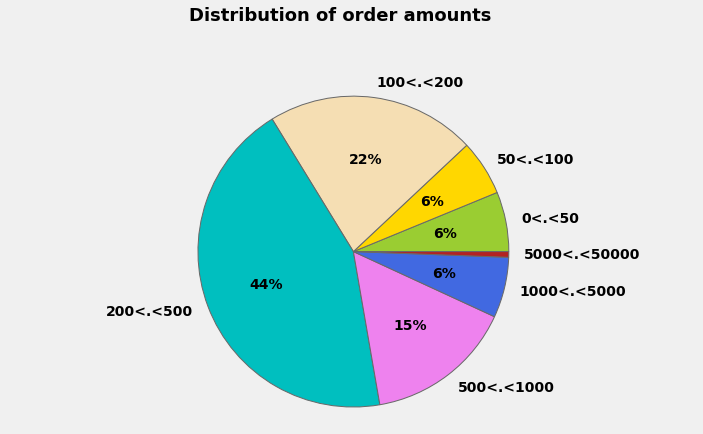

In [51]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i,price in enumerate(price_range):
    if i==0:continue
    val = basket_price[(basket_price['Basket Price'] < price)&
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue', 'firebrick']
labels = ["{}<.<{}".format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels = labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle = 0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha = 'center', fontsize = 18)
plt.show()

It can be seen that the vast majority of orders concern relatively large purchases given that  ∼ 65% of purchases give prizes in excess of £ 200.

# Analyzing product Description:

In the dataframe, products are uniquely identified through the StockCode variable. A shrort description of the products is given in the Description variable. In this section, I intend to use the content of this latter variable in order to group the products into different categories.

#### 1. Products Description

As a first step, I extract from the Description variable the information that will prove useful. To do this, I use the following function:

In [52]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

This function takes as input the dataframe and analyzes the content of the Description column by performing the following operations:

* extract the names (proper, common) appearing in the products description

* for each name, I extract the root of the word and aggregate the set of names associated with this particular root

* count the number of times each root appears in the dataframe

* when several words are listed for the same root, I consider that the keyword associated with this root is the shortest name (this systematically selects the singular when there are singular/plural variants)

The first step of the analysis is to retrieve the list of products:

In [53]:
df_produits = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})

Once this list is created, I use the function I previously defined in order to analyze the description of the various products:

In [54]:
import datetime, nltk, warnings

In [55]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

Nb of keywords in variable 'Description': 1484


The execution of this function returns three variables:

* keywords: the list of extracted keywords

* keywords_roots: a dictionary where the keys are the keywords roots and the values are the lists of words associated with those roots

* count_keywords: dictionary listing the number of times every word is used

At this point, I convert the count_keywords dictionary into a list, to sort the keywords according to their occurences:

In [56]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

Using it, I create a representation of the most common keywords:

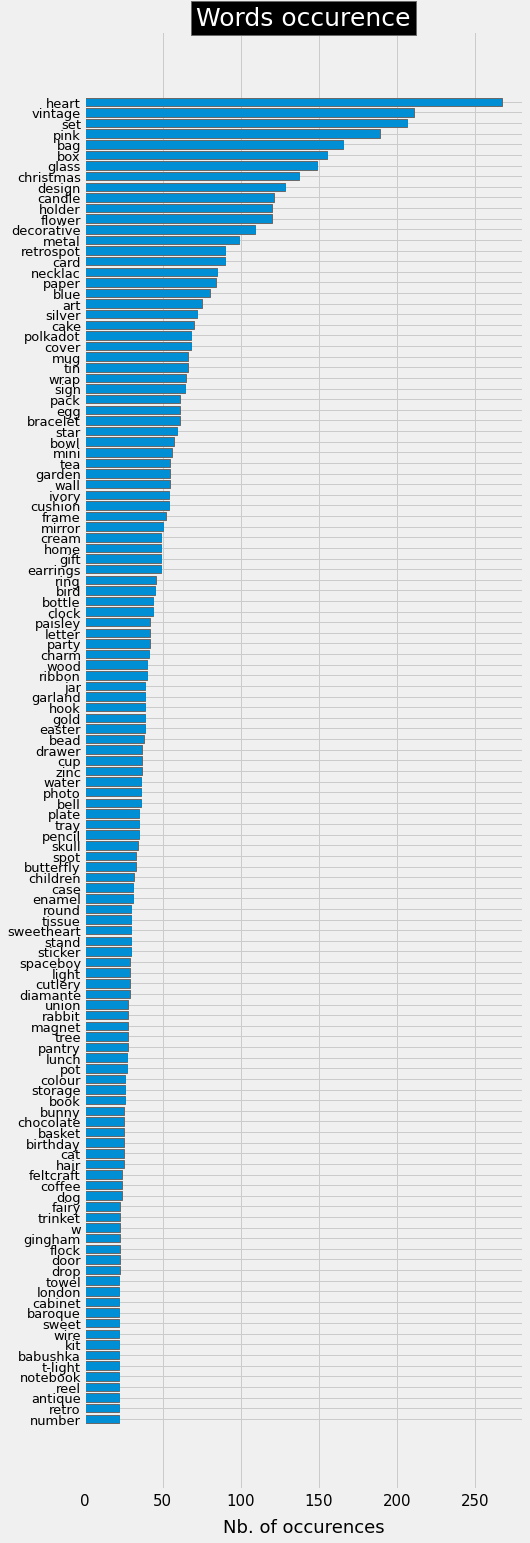

In [57]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)
#_______________________________
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

# Defining product categories

The list that was obtained contains more than 1400 keywords and the most frequent ones appear in more than 200 products. However, while examinating the content of the list, I note that some names are useless. Others are do not carry information, like colors. Therefore, I discard these words from the analysis that follows and also, I decide to consider only the words that appear more than 13 times.

In [58]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
#______________________________________________________    
list_products.sort(key = lambda x:x[1], reverse = True)
print('mots conservés:', len(list_products))

mots conservés: 193


# Data Encoding

Now I will use these keywords to create groups of product. Firstly, I define the  X  matrix as:
where the  ai,j  coefficient is 1 if the description of the product  i  contains the word  j , and 0 otherwise.

In [59]:
liste_produits = df_n['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_produits))

The  X  matrix indicates the words contained in the description of the products using the one-hot-encoding principle. In practice, I have found that introducing the price range results in more balanced groups in terms of element numbers. Hence, I add 6 extra columns to this matrix, where I indicate the price range of the products:

In [60]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df_n[ df_n['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

and to choose the appropriate ranges, I check the number of products in the different groups:

In [61]:
print("{:<8} {:<20} \n".format('gamme', 'nb. produits') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

gamme    nb. produits         
--------------------
0<.<1       964                 
1<.<2       1009                
2<.<3       673                 
3<.<5       606                 
5<.<10      470                 
.>10        156                 


# Creating clusters of products

In this section, I will group the products into different classes. In the case of matrices with binary encoding, the most suitable metric for the calculation of distances is the Hamming's metric. Note that the kmeans method of sklearn uses a Euclidean distance that can be used, but it is not to the best choice in the case of categorical variables. However, in order to use the Hamming's metric, we need to use the kmodes package which is not available on the current plateform. Hence, I use the kmeans method even if this is not the best choice.

In order to define (approximately) the number of clusters that best represents the data, I use the silhouette score:

# K- Means

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [63]:
matrix = X.values

In [64]:
# Using optimal number of clusters using hyperparameter tuning:
for n_clusters in range(3, 10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    sil_avg = silhouette_score(matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  3 The average silhouette_score is :  0.10071681758064248
For n_clusters :  4 The average silhouette_score is :  0.12609893747265383
For n_clusters :  5 The average silhouette_score is :  0.1454649521746832
For n_clusters :  6 The average silhouette_score is :  0.14389841472426354
For n_clusters :  7 The average silhouette_score is :  0.1525248443123223
For n_clusters :  8 The average silhouette_score is :  0.14863832493052118
For n_clusters :  9 The average silhouette_score is :  0.13292280010870286


In practice, the scores obtained above can be considered equivalent since, depending on the run, scores of  0.1±0.05  will be obtained for all clusters with n_clusters  >  3 (we obtain slightly lower scores for the first cluster). On the other hand, I found that beyond 5 clusters, some clusters contained very few elements. I therefore choose to separate the dataset into 5 clusters. In order to ensure a good classification at every run of the notebook, I iterate untill we obtain the best possible silhouette score, which is, in the present case, around 0.15:

In [65]:
# Choosing number of clusters as 5:
# Trying Improving the silhouette_score :
n_clusters = 5
sil_avg = -1
while sil_avg < 0.145:
    kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    sil_avg = silhouette_score(matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  5 The average silhouette_score is :  0.1466257603527048


# Characterizing the content of clusters

To check the number of elements in every class:

In [66]:
# Printing number of elements in each cluster :
pd.Series(clusters).value_counts()

3    1009
0     964
4     762
2     673
1     470
dtype: int64

a / Silhouette intra-cluster score

In order to have an insight on the quality of the classification, we can represent the silhouette scores of each element of the different clusters. This is the purpose of the next figure which is taken from the sklearn documentation:

In [67]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

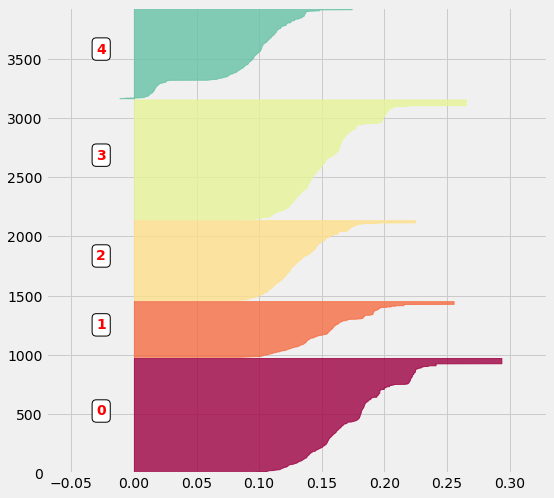

In [68]:
# Plotting the intra cluster silhouette distances.
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(matrix, clusters)
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

# Analysis using wordcloud:

Checking which words are most common in the clusters.

Now we can have a look at the type of objects that each cluster represents. In order to obtain a global view of their contents, I determine which keywords are the most frequent in each of them

In [69]:
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

# Creating data for printing word cloud.
for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

In [70]:
# Code for printing word cloud.
from random import randint
import random
def random_color_func(word=None, font_size=None, position=None,orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [71]:
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4, 2, increment)
    words = dict()
    trunc_occurances = liste[0:150]
    for s in trunc_occurances:
        words[s[0]] = s[1]

    wc = WordCloud(width=1000,height=400, background_color='lightgrey', max_words=1628,relative_scaling=1,
                             color_func = random_color_func, normalize_plurals=False)
    wc.generate_from_frequencies(words)
    ax1.imshow(wc, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster n{}'.format(increment-1))

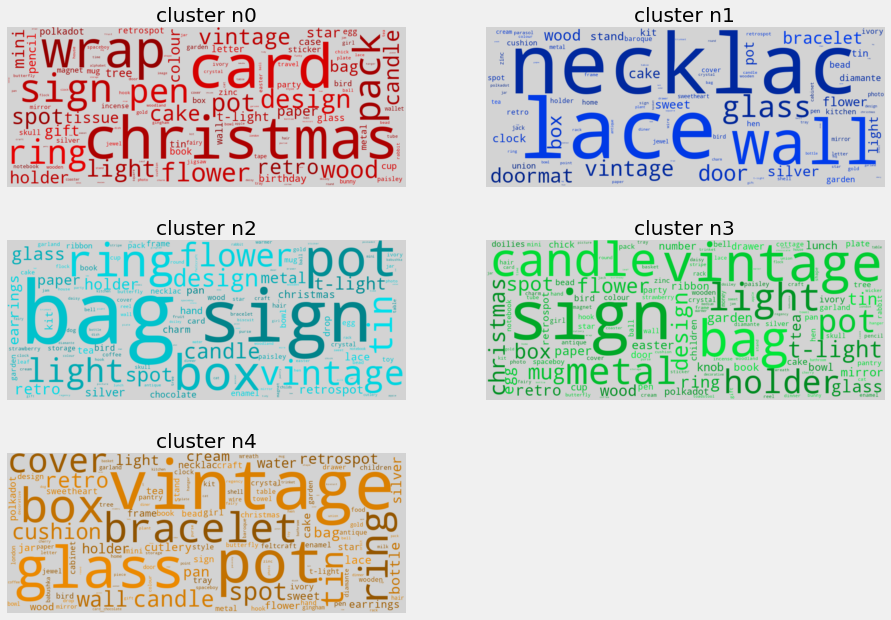

In [72]:
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]
    tone = color[i]
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)

Observations:

* Cluster number two contains all the items related to decoration and gifts.

* Cluster number 4 contains luxury items.

* Words like Vintage are common to most of the clusters.

# Principal Component Analysis

In order to ensure that these clusters are truly distinct, I look at their composition. Given the large number of variables of the initial matrix, I first perform a PCA:

In [73]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

and then check for the amount of variance explained by each component:

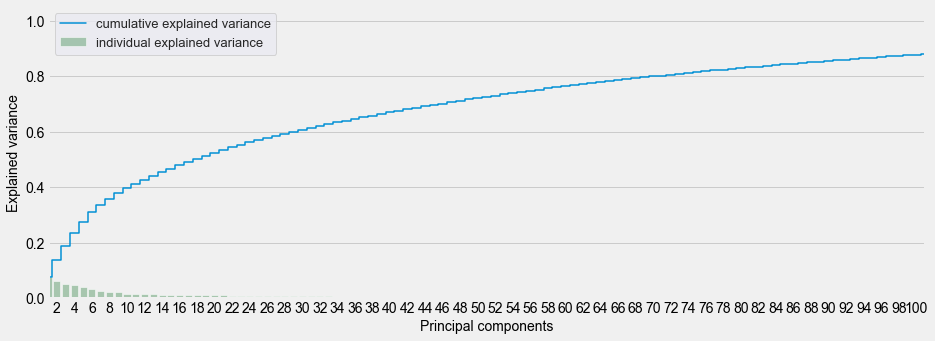

In [74]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

We need more than 100 Principal Components to explain more than 90 % of the variance.

In [75]:
pca = PCA(n_components=50)
matrix_9D = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters)

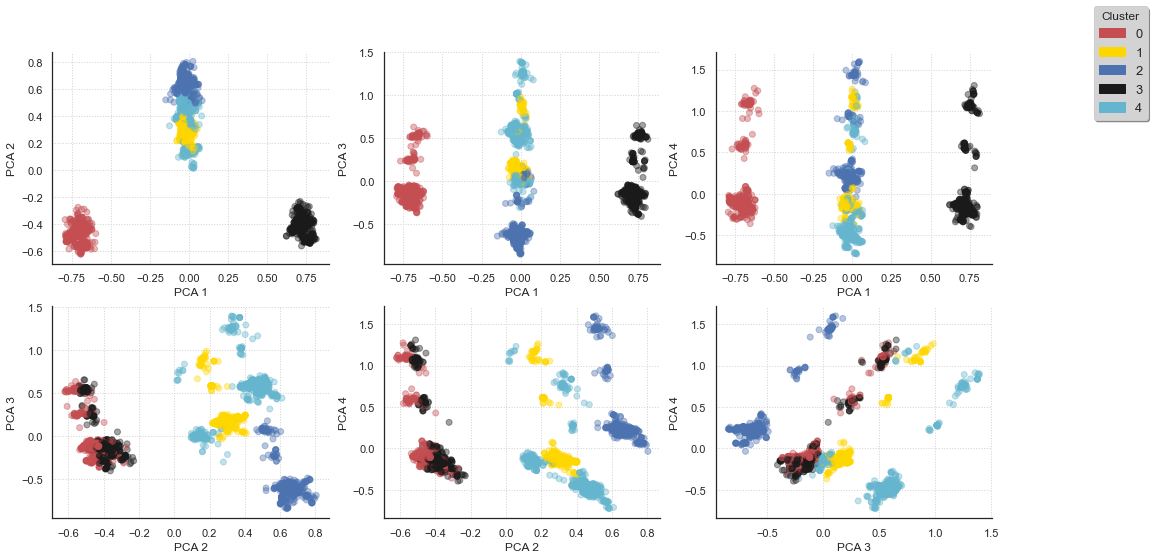

In [76]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (15,8))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):    
        increment += 1
        ax = fig.add_subplot(2,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(5):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.show()

# Customer categories

We will use the already generated product categories and create a new feature which tells to which category the product belongs to.

### Formatting data

In the previous section, the different products were grouped in five clusters. In order to prepare the rest of the analysis, a first step consists in introducing this information into the dataframe. To do this, I create the categorical variable categ_product where I indicate the cluster of each product :

In [77]:
corresp = dict()
for key, val in zip (liste_produits, clusters):
    corresp[key] = val 
#__________________________________________________________________________
df_n['categ_product'] = df_n.loc[:, 'Description'].map(corresp)

In [78]:
df_n['categ_product'] = df_n.loc[:, 'Description'].map(corresp)
df_n[['InvoiceNo', 'Description', 'categ_product']][:10]

,InvoiceNo,Description,categ_product
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,2
1,536365,WHITE METAL LANTERN,4
2,536365,CREAM CUPID HEARTS COAT HANGER,4
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,4
4,536365,RED WOOLLY HOTTIE WHITE HEART.,4
5,536365,SET 7 BABUSHKA NESTING BOXES,1
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,4
7,536366,HAND WARMER UNION JACK,2
8,536366,HAND WARMER RED POLKA DOT,3
9,536367,ASSORTED COLOUR BIRD ORNAMENT,3


Grouping products

In a second step, I decide to create the categ_N variables that contains the amount spent in each product category:

In [79]:
# Creating 5 new features that will contain the amount in a single transanction on different categories of product.
for i in range(5):
    col = 'categ_{}'.format(i)
    df_temp = df_n[df_n['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCancelled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_n.loc[:, col] = price_temp
    df_n[col].fillna(0, inplace = True)

df_n[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']][:10]

,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,2,0.0,0.0,15.3,0.00,0.00
1,536365,WHITE METAL LANTERN,4,0.0,0.0,0.0,0.00,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,4,0.0,0.0,0.0,0.00,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,4,0.0,0.0,0.0,0.00,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,4,0.0,0.0,0.0,0.00,20.34
5,536365,SET 7 BABUSHKA NESTING BOXES,1,0.0,15.3,0.0,0.00,0.00
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,4,0.0,0.0,0.0,0.00,25.50
7,536366,HAND WARMER UNION JACK,2,0.0,0.0,11.1,0.00,0.00
8,536366,HAND WARMER RED POLKA DOT,3,0.0,0.0,0.0,11.10,0.00
9,536367,ASSORTED COLOUR BIRD ORNAMENT,3,0.0,0.0,0.0,54.08,0.00


Up to now, the information related to a single order was split over several lines of the dataframe (one line per product). I decide to collect the information related to a particular order and put in in a single entry. I therefore create a new dataframe that contains, for each order, the amount of the basket, as well as the way it is distributed over the 5 categories of products:

# A single order is split into multiple entries we will basket them:

In [80]:
# sum of purchases by user and order.
temp = df_n.groupby(by=['CustomerID', 'InvoiceNo'], as_index = False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice': 'Basket Price'})

# percentage spent on each product category
for i in range(5):
    col = "categ_{}".format(i)
    temp = df_n.groupby(by=['CustomerID', 'InvoiceNo'], as_index = False)[col].sum()
    basket_price.loc[:, col] = temp

# Dates of the order.
df_n['InvoiceDate_int'] = df_n['InvoiceDate'].astype('int64')
temp = df_n.groupby(by=['CustomerID', 'InvoiceNo'], as_index = False)['InvoiceDate_int'].mean()
df_n.drop('InvoiceDate_int', axis = 1, inplace=True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

# Selecting entries with basket price > 0.
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending=True)[:5]

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
1,12347,537626,711.79,23.40,124.44,83.40,187.2,293.35,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,84.34,0.00,53.10,130.5,207.45,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,81.00,0.00,71.10,330.9,153.25,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,41.40,19.90,78.06,74.4,168.76,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,61.30,97.80,119.70,109.7,196.41,2011-08-02 08:48:00.000000000


# Separation of data over time

In [81]:
basket_price['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [82]:
basket_price['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [83]:
basket_price['InvoiceDate'].mean()

Timestamp('2011-07-01 17:32:29.703417600')

In [84]:
import datetime
pd.to_datetime('2011-10-1')

Timestamp('2011-10-01 00:00:00')

In [85]:
import datetime
set_entrainment = basket_price[basket_price['InvoiceDate'] < pd.to_datetime('2011-10-1')]
set_test = basket_price[basket_price['InvoiceDate'] >= pd.to_datetime('2011-10-1')]
basket_price = set_entrainment.copy(deep = True)

# Consumer Order Combinations

In a second step, I group together the different entries that correspond to the same user. I thus determine the number of purchases made by the user, as well as the minimum, maximum, average amounts and the total amount spent during all the visits:

In [86]:
transanctions_per_user = basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count', 'min', 'max', 'mean', 'sum'])

for i in range(5):
    col = 'categ_{}'.format(i)
    transanctions_per_user.loc[:, col] = basket_price.groupby(by=['CustomerID'])[col].sum() / transanctions_per_user['sum'] * 100

transanctions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transanctions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347,5,382.52,711.79,558.172000,2790.86,10.442659,8.676179,14.524555,29.836681,36.519926
1,12348,4,227.44,892.80,449.310000,1797.24,38.016069,0.000000,0.000000,41.953217,20.030714
2,12350,1,334.40,334.40,334.400000,334.40,11.692584,0.000000,27.900718,48.444976,11.961722
3,12352,6,144.35,840.30,345.663333,2073.98,0.491808,14.301006,3.370331,12.892120,68.944734
4,12353,1,89.00,89.00,89.000000,89.00,0.000000,22.359551,19.887640,13.033708,44.719101


In [87]:
# Generating two new variables - days since first puchase and days since last purchase.
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transanctions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transanctions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

In [88]:
transanctions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12347,5,382.52,711.79,558.172000,2790.86,10.442659,8.676179,14.524555,29.836681,36.519926,59,297
1,12348,4,227.44,892.80,449.310000,1797.24,38.016069,0.000000,0.000000,41.953217,20.030714,5,288
2,12350,1,334.40,334.40,334.400000,334.40,11.692584,0.000000,27.900718,48.444976,11.961722,240,240
3,12352,6,144.35,840.30,345.663333,2073.98,0.491808,14.301006,3.370331,12.892120,68.944734,2,226
4,12353,1,89.00,89.00,89.000000,89.00,0.000000,22.359551,19.887640,13.033708,44.719101,134,134


We need to focus on customers who only placed one order, our objective is to target these customers in a way to retains them.

In [89]:
n1 = transanctions_per_user[transanctions_per_user['count'] == 1].shape[0]
n2 = transanctions_per_user.shape[0]
print("No. of Customers with single purchase : {:<2}/{:<5} ({:<2.2f}%)".format(n1, n2, n1/n2*100))

No. of Customers with single purchase : 1445/3608  (40.05%)


# Building Customer Segments:

# Data encoding

The dataframe transactions_per_user contains a summary of all the commands that were made. Each entry in this dataframe corresponds to a particular client. I use this information to characterize the different types of customers and only keep a subset of variables:

In [90]:
list_cols = ['count', 'min', 'max', 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
selected_customers = transanctions_per_user.copy(deep=True)
matrix = selected_customers[list_cols].values

In practice, the different variables I selected have quite different ranges of variation and before continuing the analysis, I create a matrix where these data are standardized:

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(matrix)
print("Variable Mean Values: \n" + 90*'-' + '\n', scaler.mean_)
scaled_matrix = scaler.transform(matrix)

Variable Mean Values: 
------------------------------------------------------------------------------------------
 [  3.62305987 259.93189634 556.26687999 377.06036244  13.98907929
  15.67936332  21.19884856  25.22916919  23.91238925]


In [92]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

the amount of variance explained by each of the components:

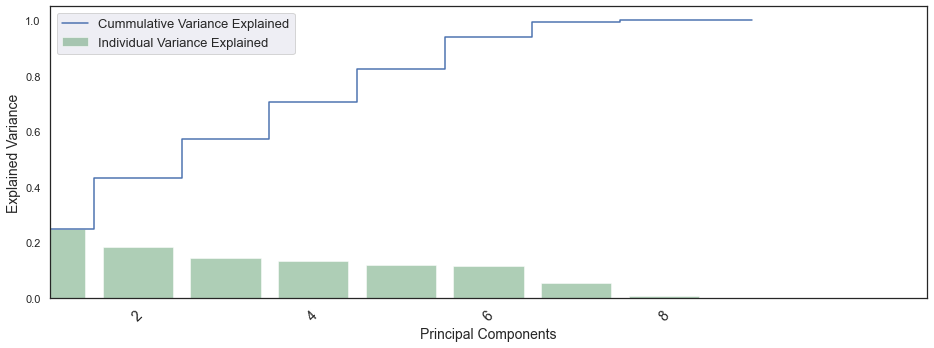

In [93]:
# Checking the amount of variance explained :
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where = 'mid', label = 'Cummulative Variance Explained')
sns.barplot(np.arange(1, matrix.shape[1] + 1), pca.explained_variance_ratio_, alpha = 0.5, color = 'g',
            label = 'Individual Variance Explained')
plt.xlim(0, 10)
plt.xticks(rotation = 45, fontsize = 14)
ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel("Explained Variance", fontsize = 14)
plt.xlabel("Principal Components", fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 13)
plt.show()

# Creation of customer categories

In [94]:
n_clusters = 11
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.214


In [95]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb. de clients']).T

,3,7,1,2,10,0,9,8,5,4,6
nb. de clients,1448,444,431,351,284,261,189,169,12,11,8


# Report via the PCA

There is a certain disparity in the sizes of different groups that have been created. Hence I will now try to understand the content of these clusters in order to validate (or not) this particular separation. At first, I use the result of the PCA:

In [96]:
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

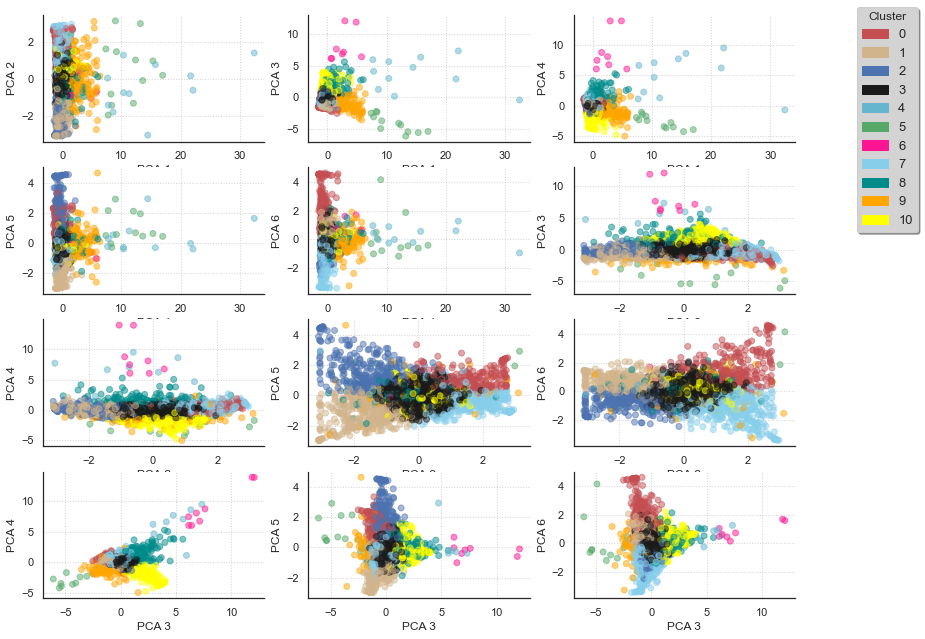

In [97]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()


From this representation, it can be seen, for example, that the first principal component allow to separate the tiniest clusters from the rest. More generally, we see that there is always a representation in which two clusters will appear to be distinct.

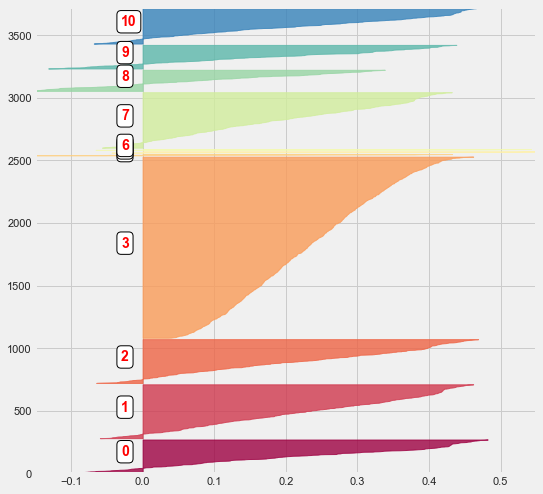

In [98]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)

graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

From this above graph we can rest assured that all the clusters are disjoint

## Customers morphotype

Now we need to learn the habits of the customers to do that we will add the variables that define a cluster to which each customer belong:

In [99]:
selected_customers.loc[:, 'cluster'] = clusters_clients
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])

merged_df.drop('CustomerID', axis = 1, inplace = True)
print('Number of customers : ', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

Number of customers :  3608


Finally, I re-organize the content of the dataframe by ordering the different clusters: first, in relation to the amount wpsent in each product category and then, according to the total amount spent:

In [100]:
# Reorganizing the content of the dataframe.
liste_index = []
for i in range(5):
    column = 'categ_{}'.format(i)
    liste_index.append(merged_df[merged_df[column] > 45].index.values[0])

liste_index_reordered = liste_index
liste_index_reordered += [s for s in merged_df.index if s not in liste_index]

merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
merged_df.head()

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,size
0,0.0,2.241379,192.175096,317.988314,247.081669,590.462759,55.100992,5.559843,11.391504,19.595122,8.352539,96.796935,166.295019,261
1,2.0,2.501425,193.559775,313.719972,247.197748,639.210516,5.283387,52.104009,11.651204,11.666522,19.310955,120.307692,192.464387,351
2,10.0,2.612676,207.431514,373.194261,286.162133,812.888345,6.904333,7.245766,61.482574,14.826633,9.540693,102.373239,194.404930,284
3,7.0,2.432432,213.385608,327.845250,267.693946,665.675881,11.988691,6.164107,12.867641,57.788278,11.194636,103.114865,175.277027,444
4,1.0,2.211137,211.327564,355.947726,273.899172,689.880464,5.232259,12.861180,11.546120,10.727557,59.655594,112.025522,173.452436,431


Saving the selected customer dataframe and above dataframe to csv so that we do not need to do all this again:

In [101]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

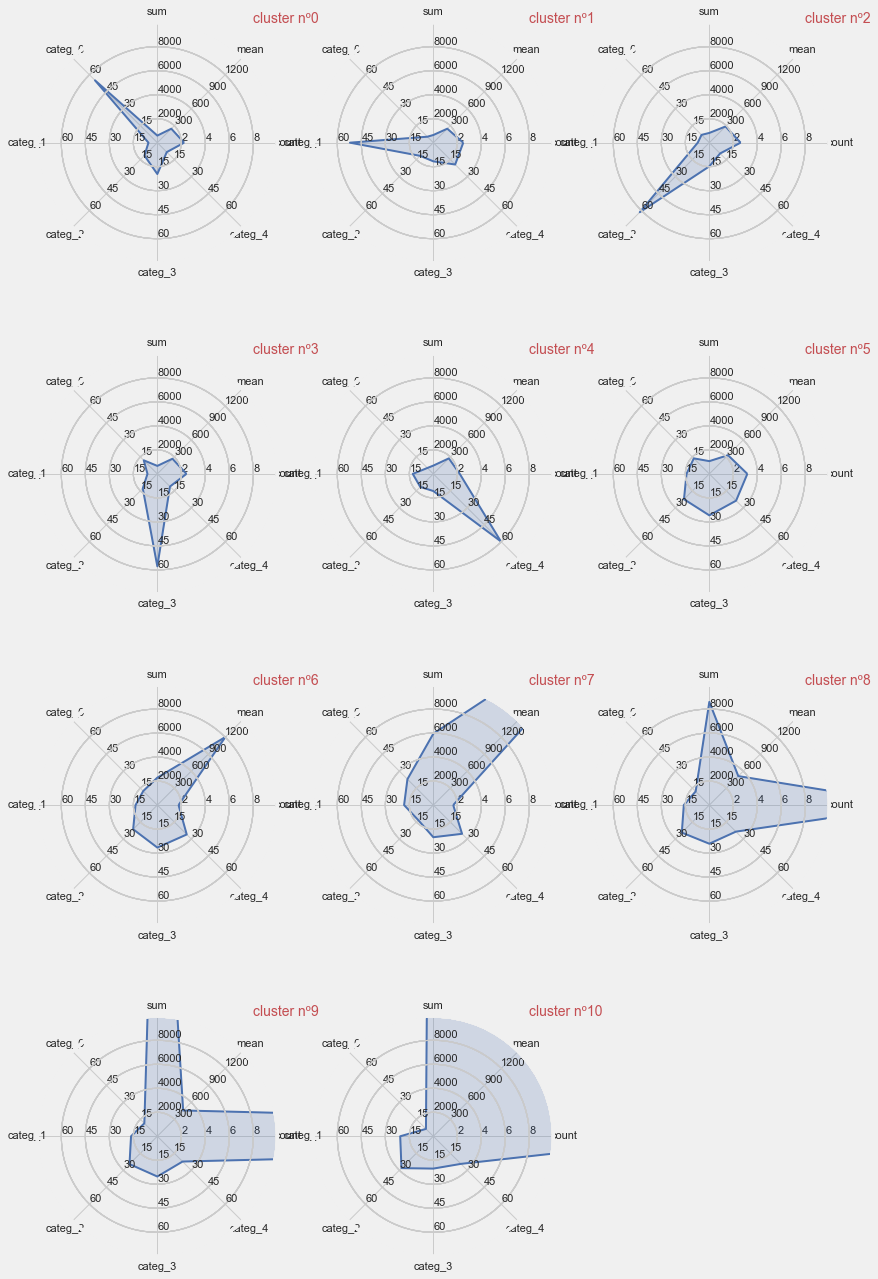

In [102]:
fig = plt.figure(figsize=(10,12))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1 

## Classification of customers

In [103]:
selected_customers.to_csv("selected_customers.csv")
merged_df.to_csv("merged_df.csv")

In [104]:
# Classifying the Customer
selected_customers = pd.read_csv('selected_customers.csv')
merged_df = pd.read_csv('merged_df.csv')

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
class Class_Fit(object):
    def __init__(self, clf, params = None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)

    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)

    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)

    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} %".format(100 * accuracy_score(Y, self.predictions)))

In [106]:
selected_customers.head()

,Unnamed: 0,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,cluster
0,0,12347,5,382.52,711.79,558.172000,2790.86,10.442659,8.676179,14.524555,29.836681,36.519926,59,297,3
1,1,12348,4,227.44,892.80,449.310000,1797.24,38.016069,0.000000,0.000000,41.953217,20.030714,5,288,0
2,2,12350,1,334.40,334.40,334.400000,334.40,11.692584,0.000000,27.900718,48.444976,11.961722,240,240,7
3,3,12352,6,144.35,840.30,345.663333,2073.98,0.491808,14.301006,3.370331,12.892120,68.944734,2,226,1
4,4,12353,1,89.00,89.00,89.000000,89.00,0.000000,22.359551,19.887640,13.033708,44.719101,134,134,1


Since we are trying to predict the customer segment/cluster, we will choose cluster column as the target.

In [107]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
X = selected_customers[columns]
Y = selected_customers['cluster']

### Train Test splitting:

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

### Training Models

In [109]:
from sklearn.svm import LinearSVC
svc = Class_Fit(clf=LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)
svc.grid_fit(X=X_train, Y=Y_train)
svc.grid_predict(X_test, Y_test)

Precision: 82.55 %


### Confusion Matrix

In [110]:
from sklearn.metrics import confusion_matrix

# code from -> SKLEARN Documentation.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 56   0   0   0   0   0   0   0   0   0   0]
 [  0  81   4   2   0   0   0   0   0   0   0]
 [  0   0  70   0   0   0   0   0   0   1   0]
 [  2  10   3 198   0   0   0  13  32  14   3]
 [  0   0   0   0   0   0   0   0   0   1   1]
 [  1   0   0   0   0   0   0   0   0   2   0]
 [  0   0   0   0   0   0   0   0   0   1   0]
 [  1   0   0   1   0   0   0  96   0   0   0]
 [  2   3   0  14   0   0   0   2   5   5   0]
 [  0   2   0   0   0   0   0   5   0  33   0]
 [  0   0   0   0   0   0   0   0   0   1  57]]


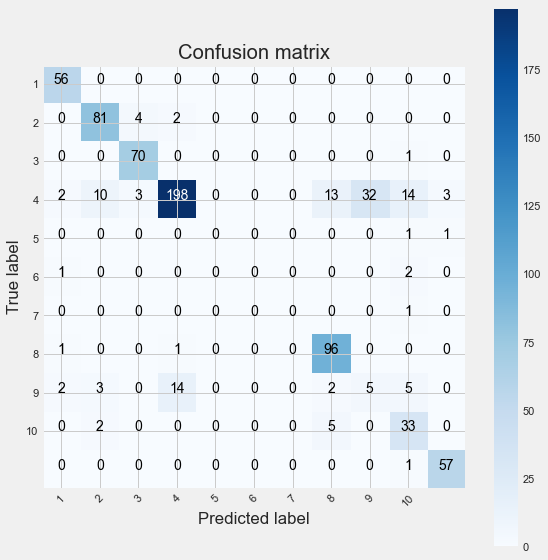

In [111]:
class_names = [i for i in range(1,11)]
cnf = confusion_matrix(Y_test, svc.predictions)
np.set_printoptions(precision=2)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf, class_names)

### Learning Curve

A typical way to test the quality of a fit is to draw a learning curve. In particular, this type of curves allow to detect possible drawbacks in the model, linked for example to over- or under-fitting. This also shows to which extent the mode could benefit from a larger data sample

In [112]:
# Code from sklearn documentation.
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

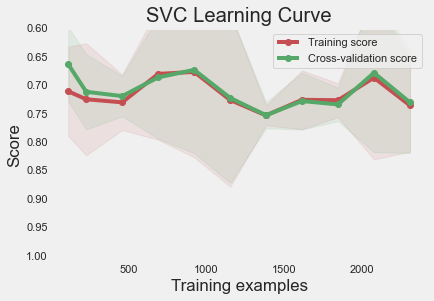

In [113]:
g = plot_learning_curve(svc.grid.best_estimator_, "SVC Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

On this curve, we can see that the train and cross-validation curves converge towards the same limit when the sample size increases. This is typical of modeling with low variance and proves that the model does not suffer from overfitting. Also, we can see that the accuracy of the training curve is correct which is synonymous of a low bias. Hence the model does not underfit the data.

### Logistic Regression

Consider the logistic regression classifier. As before, create an instance of the Class_Fit class, adjust the model on the training data and see how the predictions compare to the real values:

In [114]:
from sklearn.linear_model import LogisticRegression
lr = Class_Fit(clf = LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-1,2,10)}], Kfold = 5)
lr.grid_fit(X_train, Y_train)
lr.grid_predict(X_test, Y_test)

Precision: 89.34 %


Confusion matrix, without normalization
[[ 55   0   0   1   0   0   0   0   0   0   0]
 [  0  80   0   7   0   0   0   0   0   0   0]
 [  0   0  65   6   0   0   0   0   0   0   0]
 [  2   0   0 271   0   0   0   0   0   2   0]
 [  0   0   0   0   0   0   0   0   0   2   0]
 [  0   0   0   0   2   1   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0]
 [  2   0   0   4   0   0   0  92   0   0   0]
 [  1   2   0  23   0   0   0   0   0   5   0]
 [  0   0   0  11   0   0   0   0   1  28   0]
 [  0   0   0   5   0   0   0   0   0   0  53]]


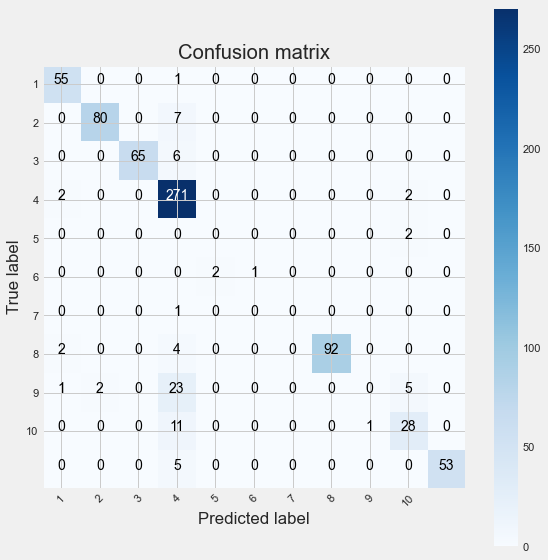

In [115]:
cnf = confusion_matrix(Y_test, lr.predictions)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf, class_names)

In [116]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

Precision: 89.34 %


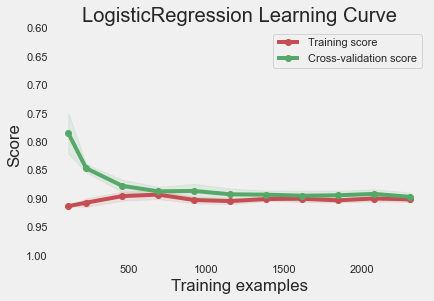

In [117]:
g = plot_learning_curve(lr.grid.best_estimator_, "LogisticRegression Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### k-Nearest Neighbors

In [118]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

Precision: 78.12 %


Confusion matrix, without normalization
[[ 44   0   0  12   0   0   0   0   0   0   0]
 [  0  71   2  13   0   0   0   0   0   1   0]
 [  0   3  54  13   0   0   0   0   0   1   0]
 [  3   4   2 254   0   0   0   1   4   3   4]
 [  0   0   0   0   0   0   0   0   0   2   0]
 [  0   0   0   0   1   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0]
 [  2   0   0  21   0   0   0  72   0   3   0]
 [  0   2   0  24   0   0   0   0   0   5   0]
 [  0   0   0  11   0   0   0   0   1  28   0]
 [  0   0   0  12   0   0   0   2   1   4  39]]


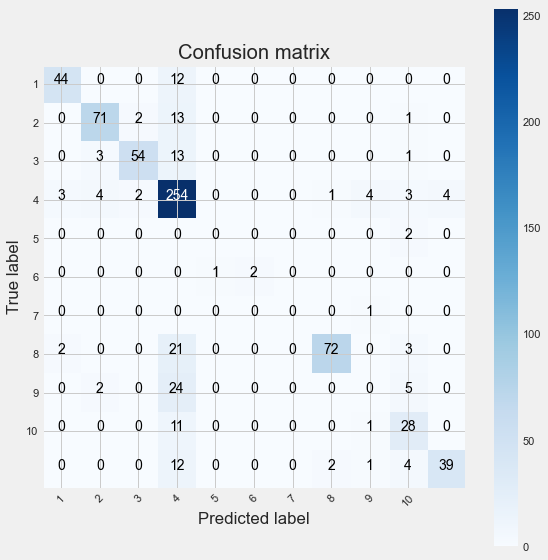

In [119]:
cnf = confusion_matrix(Y_test, knn.predictions)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf, class_names)

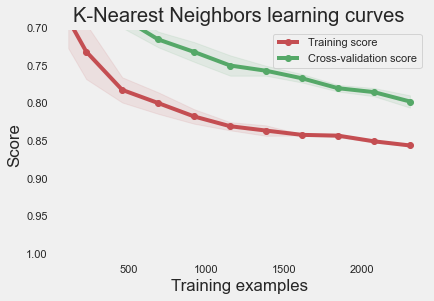

In [120]:
g = plot_learning_curve(knn.grid.best_estimator_, "K-Nearest Neighbors learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
tr = Class_Fit(clf = DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion':['entropy', 'gini'], 'max_features':['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X_train, Y_train)
tr.grid_predict(X_test, Y_test)

Precision: 82.69 %


Confusion matrix, without normalization
[[ 54   0   0   2   0   0   0   0   0   0   0]
 [  0  75   2   5   0   0   0   0   4   1   0]
 [  0   0  62   2   0   0   0   1   6   0   0]
 [  1   1   1 231   0   0   3   5  26   7   0]
 [  0   0   0   0   0   0   0   0   0   2   0]
 [  0   0   0   0   2   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0]
 [  1   0   0   3   0   0   0  93   1   0   0]
 [  3   2   0  18   0   1   1   1   2   3   0]
 [  0   1   0   8   0   0   0   1   5  23   2]
 [  0   0   0   0   0   0   0   0   1   1  56]]


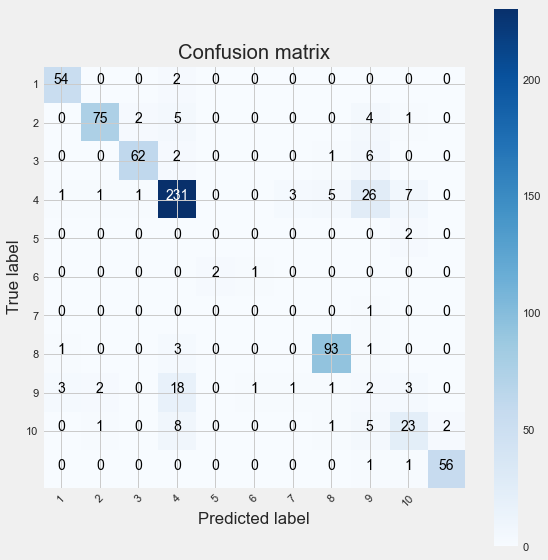

In [122]:
cnf = confusion_matrix(Y_test, tr.predictions)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf, class_names)

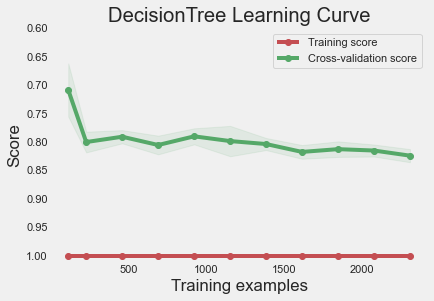

In [123]:
g = plot_learning_curve(tr.grid.best_estimator_, "DecisionTree Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Random Forests:

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf = Class_Fit(clf = RandomForestClassifier)
rf.grid_search(parameters = [{'criterion':['entropy', 'gini'],
                              'max_features':['sqrt', 'log2'], 'n_estimators':[20, 40, 60, 80, 100]}], Kfold = 5)
rf.grid_fit(X_train, Y_train)
rf.grid_predict(X_test, Y_test)

Precision: 91.00 %


Confusion matrix, without normalization
[[ 55   0   0   1   0   0   0   0   0   0   0]
 [  0  81   1   4   0   0   0   0   1   0   0]
 [  0   0  69   1   0   0   0   0   0   0   1]
 [  2   0   0 268   0   0   0   0   0   3   2]
 [  0   0   0   0   0   0   0   0   0   1   1]
 [  1   0   0   0   1   0   0   0   0   1   0]
 [  0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  94   0   3   0]
 [  3   2   0  20   0   0   0   1   0   5   0]
 [  0   0   0   7   0   0   0   0   0  32   1]
 [  0   0   0   0   0   0   0   0   0   0  58]]


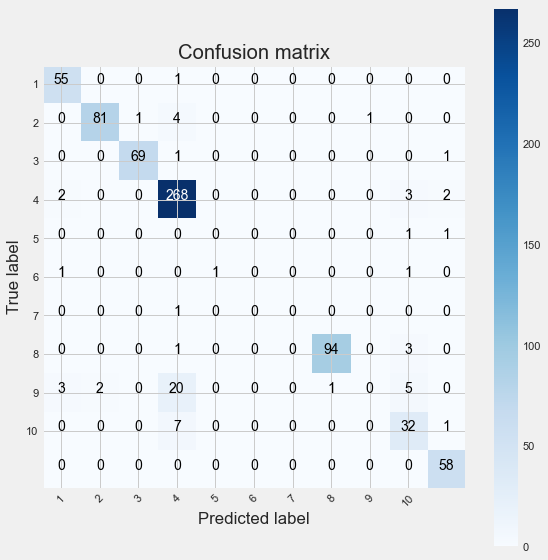

In [125]:
cnf = confusion_matrix(Y_test, rf.predictions)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf, class_names)

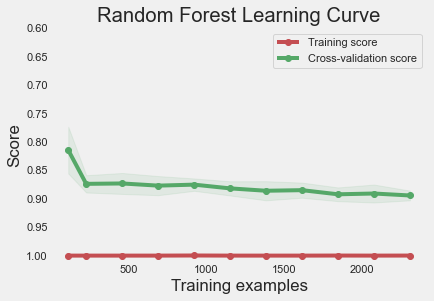

In [126]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [127]:
### AdaBoost Classifier:

In [128]:
from sklearn.ensemble import AdaBoostClassifier
ada = Class_Fit(clf = AdaBoostClassifier)
ada.grid_search(parameters = [{'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}], Kfold = 5)
ada.grid_fit(X_train, Y_train)
ada.grid_predict(X_test, Y_test)

Precision: 51.52 %


Confusion matrix, without normalization
[[  0   0   0  53   0   0   0   3   0   0   0]
 [  0   0   0  87   0   0   0   0   0   0   0]
 [  0   0   0  71   0   0   0   0   0   0   0]
 [  0   0   0 274   0   0   0   1   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0  95   0   0   0]
 [  0   0   0  30   0   0   0   1   0   0   0]
 [  0   0   0  35   0   0   0   5   0   0   0]
 [  0   0   0  56   0   0   0   2   0   0   0]]


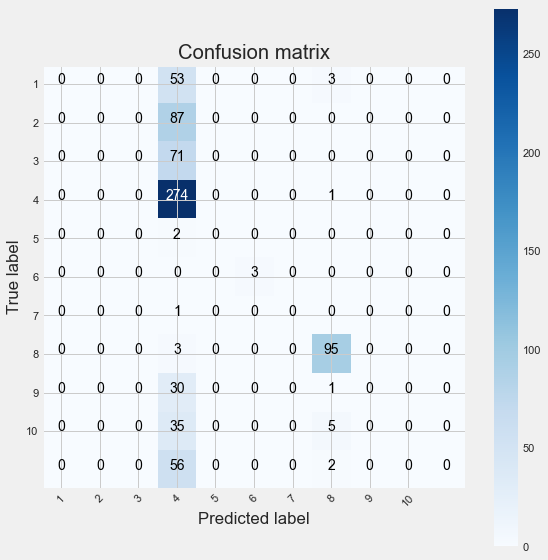

In [129]:
cnf = confusion_matrix(Y_test, ada.predictions)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf, class_names)

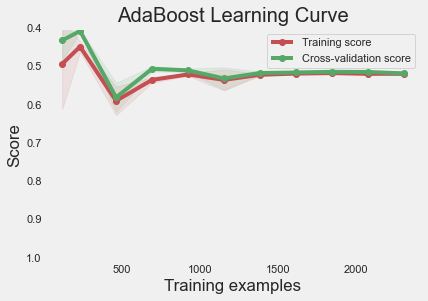

In [130]:
g = plot_learning_curve(ada.grid.best_estimator_, "AdaBoost Learning Curve", X_train, Y_train, ylim=[1.01, 0.4], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Gradient Boosted Decision Trees:

In [131]:
import xgboost
gbdt = Class_Fit(clf = xgboost.XGBClassifier)
gbdt.grid_search(parameters = [{'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}], Kfold = 5)
gbdt.grid_fit(X_train, Y_train)
gbdt.grid_predict(X_test, Y_test)

[09:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

Confusion matrix, without normalization
[[ 55   0   0   1   0   0   0   0   0   0   0]
 [  0  77   2   5   0   0   0   0   0   1   2]
 [  0   0  70   1   0   0   0   0   0   0   0]
 [  2   0   0 266   0   0   0   1   0   4   2]
 [  0   0   0   0   0   0   0   0   0   1   1]
 [  0   0   0   0   1   2   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0]
 [  1   0   0   1   0   0   0  94   0   2   0]
 [  3   2   0  20   0   0   0   1   0   5   0]
 [  0   0   0   8   0   0   0   0   0  31   1]
 [  0   0   0   0   0   0   0   1   2   0  55]]


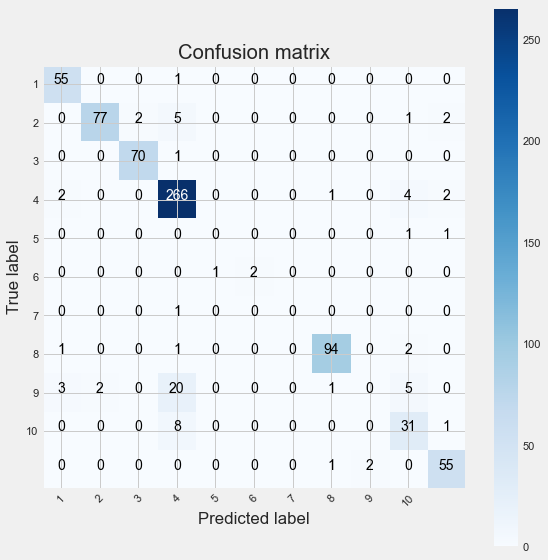

In [132]:
cnf = confusion_matrix(Y_test, gbdt.predictions)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf, class_names)

[09:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

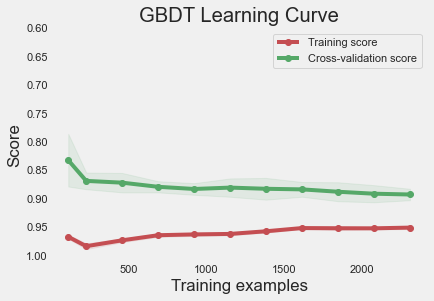

In [133]:
g = plot_learning_curve(gbdt.grid.best_estimator_, "GBDT Learning Curve", X_train, Y_train, ylim=[1.01, 0.6], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Voting Classifier:

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

In [134]:
rf_best = RandomForestClassifier(**rf.grid.best_params_)
gbdt_best = xgboost.XGBClassifier(**gbdt.grid.best_params_)
svc_best = LinearSVC(**svc.grid.best_params_)
tr_best = DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best = LogisticRegression(**lr.grid.best_params_)

In [135]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('rf', rf_best), ('gb', gbdt_best), ('knn', knn_best), ('lr', lr_best)])
votingC = votingC.fit(X_train, Y_train)
predictions = votingC.predict(X_test)
print("Precision : {:.2f}%".format(100 * accuracy_score(Y_test, predictions)))

[09:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision : 90.58%


Note that when defining the votingC classifier, I only used a sub-sample of the whole set of classifiers defined above and only retained the Random Forest, the k-Nearest Neighbors and the Gradient Boosting classifiers.

#### This is the highest precision that we have obtained.

### Testing the model

In a first step, I regroup reformattes these data according to the same procedure as used on the training set. However, I am correcting the data to take into account the difference in time between the two datasets and weights the variables count and sum to obtain an equivalence with the training set:

In [136]:
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()

#_______________________
# Correcting time range
transactions_per_user['count'] = 5 * transactions_per_user['count']
transactions_per_user['sum']   = transactions_per_user['count'] * transactions_per_user['mean']

transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347,25,382.52,711.79,558.172000,13954.3,10.442659,8.676179,14.524555,29.836681,36.519926
1,12348,20,227.44,892.80,449.310000,8986.2,38.016069,0.000000,0.000000,41.953217,20.030714
2,12350,5,334.40,334.40,334.400000,1672.0,11.692584,0.000000,27.900718,48.444976,11.961722
3,12352,30,144.35,840.30,345.663333,10369.9,0.491808,14.301006,3.370331,12.892120,68.944734
4,12353,5,89.00,89.00,89.000000,445.0,0.000000,22.359551,19.887640,13.033708,44.719101


Then, I convert the dataframe into a matrix and retain only variables that define the category to which consumers belong. At this level, I recall the method of normalization that had been used on the training set:

In [137]:
list_cols = ['count', 'min', 'max', 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
matrix_test = transanctions_per_user[list_cols].values
scaled_test_matrix = scaler.transform(matrix_test)

In [138]:
Y = kmeans.predict(scaled_test_matrix)
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = transanctions_per_user[columns]
predictions = votingC.predict(X)

In [139]:
classifiers = [(svc, 'Support Vector Machine'),
                (lr, 'Logostic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (tr, 'Decision Tree'),
                (rf, 'Random Forest'),
                (gbdt, 'Gradient Boosting')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X, Y)

______________________________ 
Support Vector Machine
Precision: 81.13 %
______________________________ 
Logostic Regression
Precision: 89.97 %
______________________________ 
k-Nearest Neighbors
Precision: 84.73 %
______________________________ 
Decision Tree
Precision: 96.54 %
______________________________ 
Random Forest
Precision: 98.17 %
______________________________ 
Gradient Boosting
Precision: 93.57 %


Finally, as anticipated it is possible to improve the quality of the classifier by combining their respective predictions. At this level, I chose to mix Random Forest, Gradient Boosting and k-Nearest Neighbors predictions because this leads to a slight improvement in predictions:

In [140]:
print("Precision : {:.2f}%".format(100 * accuracy_score(Y, predictions)))

Precision : 93.04%


#### Accuracy on test dataset is good considering we use 10 months old data to predict on new data.

# Conclusion

1. We are able to separate customers into different segments, based on the type of products that they buy.

2. Using a Voting Classifier and a combination of multiple machine learning models, such as Random Forest, Gradient Boosted Decision Trees, K-Nearest Neighbours, and Logistic Regression, we are able to predict what type of product a user will buy, with a precision of 94.07%.

3. We can use this information to target selected customers with promotional offers for their desired products, which increases the likelihood of more sales in the future.

The work described is based on a database providing details on purchases made on an E-commerce platform over a period of one year. Each entry in the dataset describes the purchase of a product, by a particular customer and at a given date. In total, approximately  ∼ 4000 clients appear in the database. Given the available information, we have decided to develop a classifier that allows to anticipate the type of purchase that a customer will make, as well as the number of visits that he will make during a year, and this from its first visit to the E-commerce site.

The first stage of this work consisted in describing the different products sold by the site, which was the subject of a first classification. There, we grouped the different products into 5 main categories of goods. In a second step, I performed a classification of the customers by analyzing their consumption habits over a period of 10 months. I have classified clients into 11 major categories based on the type of products they usually buy, the number of visits they make and the amount they spent during the 10 months. Once these categories established, we finally trained several classifiers whose objective is to be able to classify consumers in one of these 11 categories and this from their first purchase. For this, the classifier is based on 5 variables which are:

1. mean : amount of the basket of the current purchase

2. categ_N with  N ∈ [0:4] : percentage spent in product category with index  N 

Finally, the quality of the predictions of the different classifiers was tested over the last two months of the dataset. The data were then processed in two steps: first, all the data was considered (ober the 2 months) to define the category to which each client belongs, and then, the classifier predictions were compared with this category assignment. I then found that 75% of clients are awarded the right classes. The performance of the classifier therefore seems correct given the potential shortcomings of the current model. In particular, a bias that has not been dealt with concerns the seasonality of purchases and the fact that purchasing habits will potentially depend on the time of year (for example, Christmas ). In practice, this seasonal effect may cause the categories defined over a 10-month period to be quite different from those extrapolated from the last two months. In order to correct such bias, it would be beneficial to have data that would cover a longer period of time.